<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
auto[auto.isnull().any(axis=1)]

# Comment (One - two sentence)
# I don't see anything particularly interesting. The displacement is a little small (relatively), but everything else

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
auto['horsepower'].median()
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

# Comment (one sentence):
# In the previous question, I didn't see any particular connections among the missing values and other features for any correlation, so I believe this is good.


<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [64]:
# Develop the model
from sklearn import linear_model
import statsmodels.api as sm

linear_regression = linear_model.LinearRegression()
# Could've just dropped a column to get X, also convention is to call it big X
y = auto['mpg']
x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

linear_regression.fit(x, y)

results = sm.OLS(y, x).fit()
print(results.summary())

# Comment on its quality 
# I think it should be a pretty good model because all of the features have a P value of <0.05 except 1 (acceleration). Removing that may aim for a better model. The R^2 is also very high.

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2961.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:33:27   Log-Likelihood:                         -1045.3
No. Observations:                 397   AIC:                                      2105.
Df Residuals:                     390   BIC:                                      2133.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution.</h3>

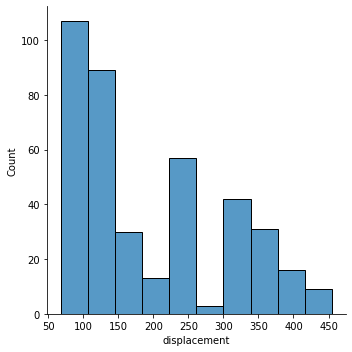

In [6]:
# Histogram of engine displacement
import seaborn as sns
sns.displot(auto, x='displacement')

<h3>Q.6. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

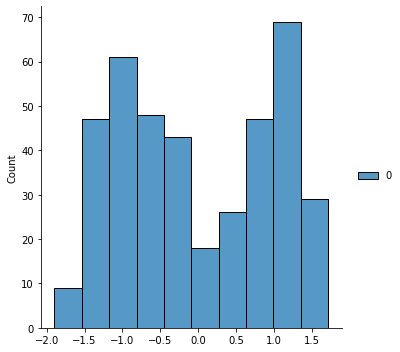

In [19]:
import numpy as np
from sklearn.preprocessing import power_transform
displacement = np.array(auto['displacement']).reshape((-1, 1))
bc_displacement = power_transform(displacement, method='box-cox')
sns.displot(bc_displacement)


<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [70]:
# Calculate then new model
from sklearn import linear_model
import statsmodels.api as sm

linear_regression = linear_model.LinearRegression()
# y = auto['mpg']
# x = auto.drop(columns="mpg")
y = auto['mpg']
x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
x['displacement'] = bc_displacement

linear_regression.fit(x, y)

results = sm.OLS(y, x).fit()
print(results.summary())

# Comment on its performance
# The performance is very similar, (r^2), however instead of 1 P value (acc) being out of whack, there are 2 variables (cylinders
# and origins that seem to no longer be correlated. The F-statistic has also risen.

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2991.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:37:13   Log-Likelihood:                         -1043.4
No. Observations:                 397   AIC:                                      2101.
Df Residuals:                     390   BIC:                                      2129.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [27]:
auto.describe()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.331234,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.266994,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

In [78]:
from sklearn import preprocessing
# Center and scale
scaler = preprocessing.StandardScaler()
y = auto['mpg']
x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape((-1, 1)))

# # Recalculate the model
linear_regression.fit(x, y)

X2 = sm.add_constant(x)
results = sm.OLS(y, X2).fit()
print(results.summary())

# Comment on its performance
# It seems that the model has become overall worse. This makes me believe I did something wrong in this assignment, or scaling was
# not overall appropriate. However, it is not significantly worse. I'm also unsure if I should be scaling the 'y'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 28 Oct 2020   Prob (F-statistic):          2.22e-141
Time:                        11:40:44   Log-Likelihood:                -221.05
No. Observations:                 397   AIC:                             458.1
Df Residuals:                     389   BIC:                             490.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-16      0.021    8.1e-15      1.0

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [10]:
# enter summery here
# I started out using train_test_split, but then removed it because I was a little lost on what the OLS results should
# be comparing. Again, I had the issue of using old values, so I've explicitly re-instantiated them each code block
# for no confusion between models. I'm also unsure about the scaling of 'y', if that is scaled, then how should I
# revert back to an actual predictable value? Also, I am curious about the 'axis' property and would like to explore
# that more.